In [1]:
import sys

sys.path.insert(0, "..")

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from funbin.geometry import Box, as_poly_collection
from funbin.penrose.deflate import pent1, run_defaltion
from funbin.penrose.robinson_triangles import (
    golden_ratio,
    penrose_tiling_robinson,
    robinson_triangles,
    robinson_triangles_border,
)

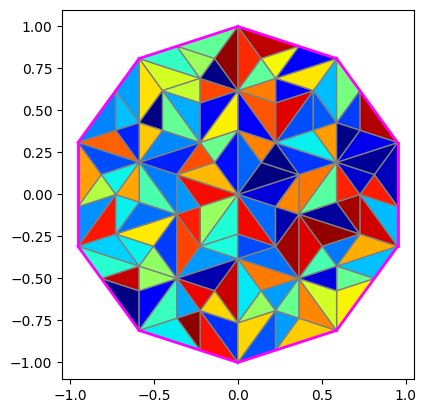

In [3]:
from matplotlib.lines import Line2D

triangles = robinson_triangles(kind="P3", divisions=3)

fig, ax = plt.subplots()
ax.add_collection(as_poly_collection(triangles, randomize_color=True))

for edge in robinson_triangles_border():
    ax.add_line(Line2D([edge[0].x, edge[1].x], [edge[0].y, edge[1].y], linewidth=2, color="magenta"))

Box.bounding_all(triangles).resized(1.1).fit_axes(ax)
ax.set_aspect("equal")

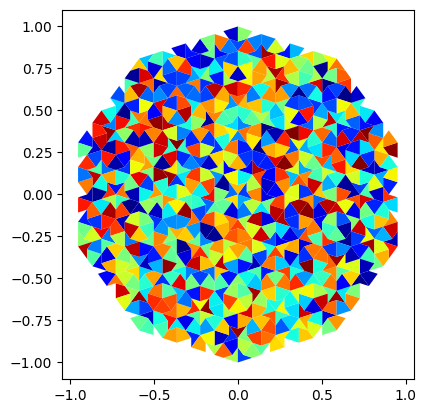

In [4]:
merged_tiling = penrose_tiling_robinson(kind="P2", divisions=5, include_incomplete_tiles=False)
fig, ax = plt.subplots()
ax.add_collection(as_poly_collection(merged_tiling, randomize_color=True, edgecolors="none"))
Box.bounding_all(triangles).resized(1.1).fit_axes(ax)
ax.set_aspect("equal")

In [5]:
tris = robinson_triangles(kind="P2", divisions=9)
areas = np.array([t.area for t in tris])

divide = 0.5 * (np.min(areas) + np.max(areas))

smalls = np.count_nonzero(areas < divide)
bigs = areas.size - smalls
print((3 * bigs + 2 * smalls) / areas.size - 1)
print(golden_ratio)

1.6180339985218035
1.618033988749895


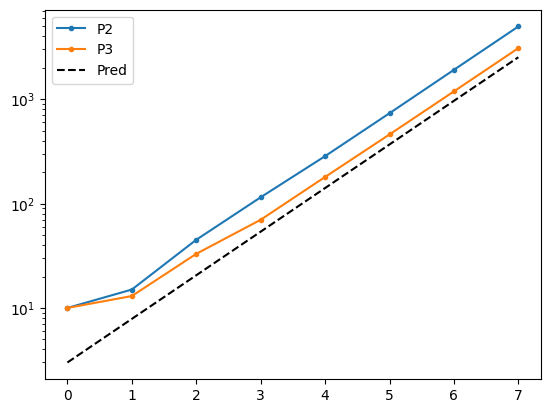

In [7]:
fig, ax = plt.subplots()

maxdiv = 7

for kind in ("P2", "P3"):
    data = []
    for div in range(maxdiv + 1):
        tl = penrose_tiling_robinson(kind=kind, divisions=div, include_incomplete_tiles=True)
        data.append((div, len(tl)))

    ax.plot(*np.array(data).T, label=kind, marker=".", linestyle="-")


div = np.linspace(0, maxdiv)
ax.plot(div, 3 * (1 + golden_ratio) ** div, linestyle="--", color="k", label="Pred")

ax.legend()
ax.set_yscale("log")

# P1 with deflation algorithm

In [63]:
from funbin.geometry import Polygon

conservative_border = run_defaltion(
    tiles=pent1,
    iterations=1,
)

pent_large = pent1[0].as_polygon()
pent_small = conservative_border[0]

points = []
rot_idx = 2
lg_vertices = list(pent_large.vertices)
lg_vertices = lg_vertices[rot_idx:] + lg_vertices[:rot_idx]
for sm_edge, lg_vertex in zip(pent_small.edges, lg_vertices):
    points.append(sm_edge[0])
    points.append(lg_vertex)
    points.append(sm_edge[1])

star = Polygon.from_points(points)

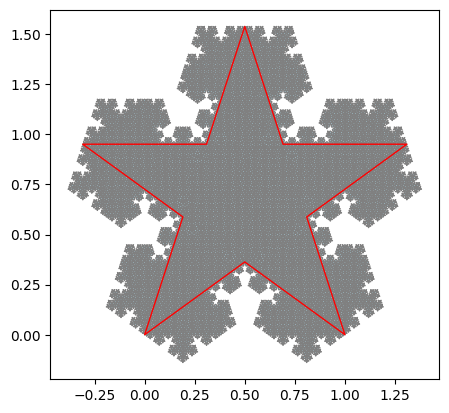

In [66]:
tiling = run_defaltion(
    tiles=pent1,
    iterations=5,
)
fig, ax = plt.subplots()
ax.add_collection(as_poly_collection(tiling, facecolors="lightblue"))
# ax.add_collection(as_poly_collection([t.as_polygon() for t in pent1], edgecolors="green"))
# ax.add_collection(as_poly_collection(conservative_border, edgecolors="red"))
ax.add_collection(as_poly_collection([star], edgecolors="red"))
Box.bounding_all(tiling).resized(1.1).fit_axes(ax)
ax.set_aspect("equal")

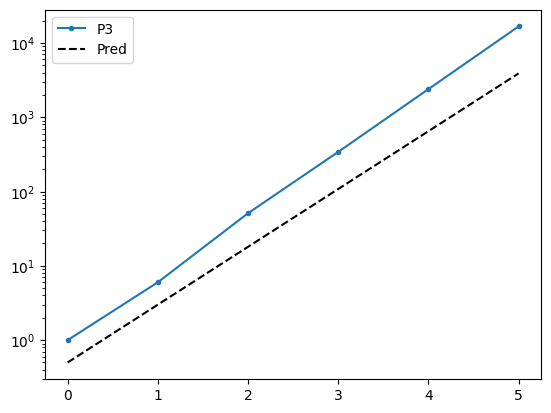

In [22]:
fig, ax = plt.subplots()

maxiter = 5

data = []
for iters in range(maxiter + 1):
    tl = run_defaltion(tiles=pent1, iterations=iters)
    data.append((iters, len(tl)))

ax.plot(*np.array(data).T, label=kind, marker=".", linestyle="-")

iters_grid = np.linspace(0, maxiter)
ax.plot(iters_grid, 0.5 * 6**iters_grid, linestyle="--", color="k", label="Pred")

ax.legend()
ax.set_yscale("log")